In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None



In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/framingham.csv")
df.rename({'male': 'sex'}, axis=1, inplace=True)
print(df.isnull().sum())




sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [45]:
y=df.TenYearCHD
x=df#.drop('TenYearCHD', axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=5)
TenYearCHD_test=xtrain.TenYearCHD
xtrain=xtrain.drop('TenYearCHD', axis=1)
xtrain = pd.DataFrame(xtrain)
xtrain = xtrain.sort_index()
print(xtrain.dtypes)


sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
dtype: object


In [6]:
ytrain

1778    0
1065    0
4150    0
3268    0
207     0
       ..
3046    0
1725    0
4079    0
2254    0
2915    0
Name: TenYearCHD, Length: 2966, dtype: int64

In [7]:
print(xtrain.isnull().sum())

sex                  0
age                  0
education           70
currentSmoker        0
cigsPerDay          21
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             37
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            277
dtype: int64


# DataCleaning - General

In [8]:
#create AgeRange categories to fill nan values by category
#bins = [0, 30, 40, 50, 60, 70, np.inf]
#labels = ['0-30', '30-40', '40-50', '50-60', '60-70', '70+']

#xtrain['AgeRange'] = xtrain.cut(xtrain['age'], bins, labels=labels)

#print(xtrain.dtypes)
#print(xtrain)

In [9]:
#xtrain.shape
#df.isnull().sum()


# DataCleaning - BPMeds, CigsperDay, totChol

In [10]:
print(xtrain.BPMeds.value_counts())
# fill NaN values in BPMeds column with 0 
xtrain.BPMeds.fillna(0,inplace=True)


0.0    2844
1.0      85
Name: BPMeds, dtype: int64


In [11]:
#cigs per day
null_data_cpd = xtrain[xtrain.isnull().cigsPerDay]
print(null_data_cpd[["currentSmoker","cigsPerDay"]])
#all the missing values of cigsperday are from people who are actually smoking, so we can fill missing values with mean of smokers
xtrain.cigsPerDay.fillna(xtrain.cigsPerDay.mean(),inplace=True)

#totChol
#fill the missing values with the mean
xtrain.totChol.fillna(xtrain.totChol.mean(),inplace=True)

      currentSmoker  cigsPerDay
139               1         NaN
1046              1         NaN
1292              1         NaN
1347              1         NaN
1451              1         NaN
1497              1         NaN
1625              1         NaN
1870              1         NaN
1963              1         NaN
2405              1         NaN
2513              1         NaN
3021              1         NaN
3034              1         NaN
3094              1         NaN
3108              1         NaN
3156              1         NaN
3177              1         NaN
3432              1         NaN
3579              1         NaN
3715              1         NaN
3924              1         NaN


# DataCleaning - Heart Rate

In [12]:
#heartrate
xtrain.dropna(subset = ["heartRate"], inplace=True)
print(xtrain.isnull().sum())


sex                  0
age                  0
education           70
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 14
heartRate            0
glucose            277
dtype: int64


# DataCleaning - Eductaion, BMI

In [13]:
#set education to 1
xtrain.loc[:,'education'] = '1'
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [20]:
i = 1
VAR_1 = 19
VAR_2 = 24
VAR_max = xtrain['age'].max()

while i < 7:

  if VAR_1 == 19: # Start Age of 19
      mean_BMI = xtrain[(xtrain.age >= VAR_1) & (xtrain.age <= VAR_2)].BMI.mean()
      mean_BMI = round(mean_BMI, 2)
      xtrain['BMI']= np.where((xtrain.age >= VAR_1) & (xtrain.age <= VAR_2) & (xtrain.BMI.isnull()), mean_BMI, xtrain.BMI)
      
  elif VAR_1 >= 25 and VAR_1 <= 54:
      mean_BMI = xtrain[(xtrain.age >= VAR_1) & (xtrain.age <= VAR_2)].BMI.mean()
      mean_BMI = round(mean_BMI, 2)
      xtrain['BMI']= np.where((xtrain.age >= VAR_1) & (xtrain.age <= VAR_2) & (xtrain.BMI.isnull()), mean_BMI, xtrain.BMI)

  elif VAR_1 == 55:
      mean_BMI = xtrain[(xtrain.age >= VAR_1) & (xtrain.age <= VAR_2)].BMI.mean()
      mean_BMI = round(mean_BMI, 2)
      xtrain['BMI']= np.where((xtrain.age >= VAR_1) & (xtrain.age <= VAR_2) & (xtrain.BMI.isnull()), mean_BMI, xtrain.BMI)

  elif VAR_1 == 66:
      mean_BMI = xtrain[(xtrain.age >= 66)& (xtrain.age <= VAR_max)].BMI.mean()
      mean_BMI = round(mean_BMI, 2)
      xtrain['BMI']= np.where((xtrain.age >= VAR_1) & (xtrain.age <= VAR_max) & (xtrain.BMI.isnull()), mean_BMI, xtrain.BMI)

  print('Mean of BMI(NRC): ',mean_BMI,'\tAge from: ', VAR_1,' to ', VAR_2)

  if i == 1:
     VAR_1 = 25
     VAR_2 = 34
  elif i >= 2 and i <= 3:
     VAR_1 = VAR_1 + 10
     VAR_2 = VAR_2 + 10
  elif i == 4:
     VAR_1 = 55
     VAR_2 = 65
  elif i == 5:
     VAR_1 = 66
     VAR_2 = VAR_max 

  i += 1

xtrain.isnull().sum()

Mean of BMI(NRC):  nan 	Age from:  19  to  24
Mean of BMI(NRC):  23.4 	Age from:  25  to  34
Mean of BMI(NRC):  25.36 	Age from:  35  to  44
Mean of BMI(NRC):  25.81 	Age from:  45  to  54
Mean of BMI(NRC):  26.42 	Age from:  55  to  65
Mean of BMI(NRC):  27.16 	Age from:  66  to  70


sex                  0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            277
dtype: int64

In [15]:
#fill missing values of BMI with mean value of the category
#define age groups
#bins= [30,44,57,71]
#labels = ['30-44','45-57','58-71']
#xtrain['AgeGroup'] = pd.cut(xtrain['age'], bins=bins, labels=labels, right=False)
#print (xtrain)

#print(xtrain.groupby('AgeGroup')['BMI'].mean())

#BMI1=xtrain[xtrain['AgeGroup']=='30-44'].BMI.median()
#BMI2=xtrain[xtrain['AgeGroup']=='45-57'].BMI.median()
#BMI3=xtrain[xtrain['AgeGroup']=='58-71'].BMI.median()

#print(BMI1)
#print(BMI2)
#print(BMI3)

#xtrain[xtrain['AgeGroup'] == '30-44']['BMI'].fillna(BMI1)
#xtrain[xtrain['AgeGroup'] == '45-57']['BMI'].fillna(BMI2)
#xtrain[xtrain['AgeGroup'] == '58-71']['BMI'].fillna(BMI3)


#if 'AgeGroup' == '30-44':
    #xtrain['BMI'].fillna(BMI1, inplace=True)
#elif 'AgeGroup' == '45-57':
    #xtrain['BMI'].fillna(BMI2, inplace=True)
#else:
    #xtrain['BMI'].fillna(BMI3, inplace=True)

#print(xtrain[xtrain['BMI'].isnull()])
#print(xtrain['BMI'].isnull().sum())



In [16]:
#Category 30-40
#df.loc[(df['AgeRange']=="30-40"), 'BMI'].mean()
#df.loc[(df['AgeRange']=="30-40"), 'BMI'] = df.BMI.fillna(df.loc[(df['AgeRange']=="30-40"), 'BMI'].mean())
#print(df[df['AgeRange'] == '30-40'].isnull().sum())
#df[df['AgeRange'] == '30-40'].head()


# K Nearest Neighbors for glucose

In [36]:
#save missing values of glucose in seperate dataset
null_data_glucose = xtrain[df.isnull().glucose]
#null_data_glucose = null_data_glucose.drop("AgeGroup", axis=1)
null_data_glucose = null_data_glucose.drop("glucose", axis=1)
null_data_glucose = null_data_glucose.values
print(null_data_glucose)

[[0 39 '1' ... 64.0 22.35 85.0]
 [0 43 '1' ... 77.5 29.89 70.0]
 [0 60 '1' ... 72.5 26.59 65.0]
 ...
 [0 41 '1' ... 74.0 20.85 87.0]
 [0 56 '1' ... 102.0 22.89 57.0]
 [0 44 '1' ... 87.0 19.16 86.0]]


In [22]:
#k-neartes neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
#xtrain_train = xtrain.drop(columns=["AgeGroup"], axis=1)
xtrain_train = xtrain.dropna()

#define distances on the vectors of the independent variables, so first get pandas DataFrame into a NumPy array
X = xtrain_train.drop("glucose", axis=1)
X = X.values    #independet variables
y = xtrain_train["glucose"]
y = y.values  #dependet variable of the model

print(X.shape, y.shape)

(2688, 14) (2688,)


In [23]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_test1.shape, y_test1.shape)

(807, 14) (807,)


In [24]:
#Data Standardization
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()

# transform data
X_train1 = scaler.fit_transform(X_train1) #only fit the training set
X_test1 = scaler.transform(X_test1) 



In [25]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 31),
              "weights": ["uniform","distance"],
              "metric": ["euclidean", "manhattan"]}
              
gs=GridSearchCV(KNeighborsRegressor(), parameters, scoring="neg_mean_squared_error",cv=10, n_jobs=-1)

#fitting the model for grid
gs_results = gs.fit(X_train1, y_train1)

In [26]:
print(gs_results.best_params_)
#beste metrik durch GridSearch

{'metric': 'euclidean', 'n_neighbors': 16, 'weights': 'uniform'}


In [27]:
print(gs_results.best_score_) #andere metrik

-404.0895361817341


In [28]:
#Cross Validation
#import k-folder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 16)

# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
score = cross_val_score(knn, X, y, cv=5, scoring="neg_root_mean_squared_error")
#takes the features X (independet variables) and target y (dependent variable) -> splits into k-folds (cv parameter)
#Model is trained using K-1 of the folds as training data
print(score)

#average of these five scores to get accuracy score
print("The accuracy of the model is : ", -score.mean())

[-18.34797847 -21.4659388  -23.51802446 -29.25252572 -32.38091275]
The accuracy of the model is :  24.9930760406269


In [29]:
#Fit Knn Model based on grid Search findings
knn = KNeighborsRegressor(n_neighbors=16, weights='distance', metric='euclidean')
knn.fit(X_train1, y_train1)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                    weights='distance')

In [30]:
#Model evaluation
from sklearn.metrics import mean_squared_error
from math import sqrt
y_preds = knn.predict(X_test1)
mse = mean_squared_error(y_test1, y_preds)
rmse = sqrt(mse)
rmse

19.964269100297745

In [31]:
X = scaler.fit_transform(X)

In [32]:
#Fit knn model on whole dataset
knn1 = KNeighborsRegressor(n_neighbors=16, weights='distance', metric='euclidean')
knn1.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                    weights='distance')

In [38]:
#Use Knn to predict the nan values of glucose
null_data_glucose = scaler.transform(null_data_glucose) 
gluc_preds = knn1.predict(null_data_glucose)
gluc_preds
#np.count_nonzero(gluc_preds)


array([ 72.27614338,  70.98712757,  71.05203382,  74.96786879,
        71.05093639,  71.53450074,  77.39463824,  73.67703066,
        74.73924654,  73.67622742,  71.41647225, 153.96875558,
        74.41776405,  74.73545759,  71.42164833,  71.4204409 ,
       141.12056308,  74.73345452,  71.41903158,  71.4222736 ,
        73.61337473,  72.2754973 ,  71.41799286,  70.98521338,
        70.98879846,  72.27565968,  71.53232454,  74.73545338,
        72.2761087 ,  72.27595523,  72.27458264,  72.275555  ,
        70.98975087,  70.98943194,  73.67513451,  72.27624165,
        72.27695985,  72.27666303,  70.86306617,  72.27762927,
        72.27443112,  71.42067057,  70.86374352,  71.41727221,
        71.41868559,  72.27528068,  71.42169984,  73.61512761,
        72.27645756,  74.73689411,  70.86451454,  71.04452885,
        73.61408052,  72.27551889,  73.61518128,  74.73671533,
        70.98953069,  73.67716074,  71.42137991,  72.27776768,
        70.86357251,  73.61455245,  72.27590742,  71.05

In [39]:
glu_nan = xtrain['glucose'].isna()
glu_nan
#glu_nan.value_counts()

xtrain.loc[glu_nan, 'glucose'] = glu_nan


In [40]:
print(xtrain.isnull().sum())

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64


In [47]:
xtrain['TenYearCHD'] = TenYearCHD_test
xtrain.head()


,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0


In [48]:
xtrain.to_csv('framingham_cleaned.csv')

# Linear Regression for Glucose

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#evaluate the fit on the testing data
y_pred_lin = regr.predict(X_test)

#print('Coefficients: \n', regr.coef_)
# The mean squared error
mse_lin_test = (mean_squared_error(y_test, y_pred_lin))
rmse = sqrt(mse_lin_test)
print(rmse)

# The coefficient of determination: 1 is perfect prediction
print(r2_score(y_test, y_pred_lin))

18.679285557874415
0.3958693322205926


In [ ]:
#evaluate the fit on the training data
y_pred_lin1 = regr.predict(X_train)

#print('Coefficients: \n', regr.coef_)
# The mean squared error
mse_lin_train = (mean_squared_error(y_train, y_pred_lin1))
rmse1 = sqrt(mse_lin_train)
print(rmse1)
# The coefficient of determination: 1 is perfect prediction
print(r2_score(y_train, y_pred_lin1))

18.62498157775653
0.3947602078289537


# KNN Try outs

In [ ]:
correlation_matrix = df.corr()
correlation_matrix["glucose"]

sex                0.006042
age                0.119619
currentSmoker     -0.054549
cigsPerDay        -0.057385
BPMeds             0.047673
prevalentStroke    0.017986
prevalentHyp       0.085168
diabetes           0.623124
totChol            0.045255
sysBP              0.140131
diaBP              0.061347
BMI                0.081451
heartRate          0.088702
glucose            1.000000
TenYearCHD         0.123528
Name: glucose, dtype: float64

NameError: ignored

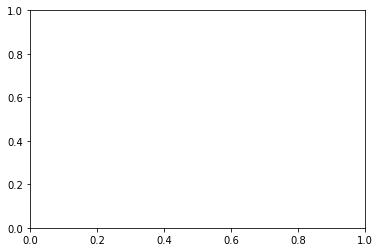

In [ ]:
#Plotting the model
#create a scatter plot of the first and second columns of X_test by subsetting the arrays X_test[:,1] and X_test[:,10]
#columns are age and sysBP --> correlated
#colorbar shows predicted glucose value
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 1], X_test[:, 10], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

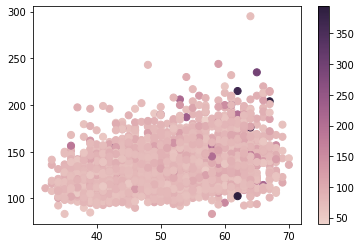

In [ ]:
f, ax = plt.subplots()
points = ax.scatter(X_train[:, 1], X_train[:, 10], c=train_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

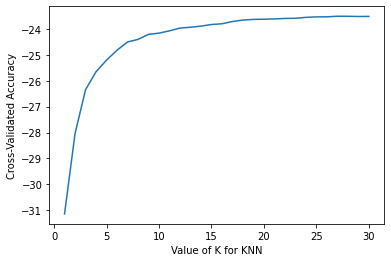

In [ ]:
#choose differenct neighbors to see which K is the best K
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 1 to 100
k_range = range(1, 31)

k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring="neg_root_mean_squared_error")
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()